# Importing Libraries and Preparing the Data<a href="#Importing-Libraries-and-Preparing-the-Data" class="anchor-link">¶</a>

## I. Introduction<a href="#I.-Introduction" class="anchor-link">¶</a>

### 1. Domain-Specific Area<a href="#1.-Domain-Specific-Area" class="anchor-link">¶</a>

Fake news detection has become one of the most pressing challenges in the digital age. The rapid growth of social media platforms and online news outlets has transformed how information is disseminated. However, this has also led to an explosion in the spread of misinformation, disinformation, and propaganda. As a result, developing intelligent systems that can automatically identify fake news is vital to maintaining the credibility of public discourse and preventing the social and political disruption it can cause.

From a technical standpoint, fake news detection is a subset of text classification where the objective is to categorize news items as either real or fake. This problem has garnered significant attention in natural language processing (NLP) and it is also closely related to tasks such as spam detection, sentiment analysis, and hate speech detection. The need for automated solutions in this space has become more apparent as manual fact-checking cannot scale with the volume of online content.

Traditional machine learning techniques such as Naive Bayes and Random Forest have been widely used for text classification. These models rely on statistical representations of text, such as Bag-of-Words (BoW) and Term Frequency-Inverse Document Frequency (TF-IDF), which capture word frequency patterns. While effective, these techniques often fail to grasp the semantic relationships between words. Recent advances in deep learning have introduced models like Recurrent Neural Networks (RNNs), Long Short-Term Memory (LSTM) and Transformer-based architectures such as BERT. These models rely on word embeddings to capture semantic meaning and can handle contextual relationships more effectively. Deep learning models have shown state-of-the-art results in a variety of NLP tasks, including fake news detection.

In this coursework, I will investigate the effectiveness of traditional statistical models like Random Forest, logistic regression, Naive Bias and SVM, then choose one of the models to compare with the deep learning model (LSTM with word embeddings) for fake news classification. The purpose is to provide a comparative evaluation and understand the trade-offs in performance, interpretability and training efficiency.

### 2. Objectives<a href="#2.-Objectives" class="anchor-link">¶</a>

The primary objective of this coursework is to develop a robust text classification system for detecting fake news and to compare the performance of a traditional statistical model with a deep learning model. Specifically, the project aims to:

**i)** Implement and evaluate a chosen classification model using TF-IDF features.  
**ii)** Build and evaluate a Long Short-Term Memory (LSTM) network using word embeddings.  
**iii)** Conduct a detailed performance comparison using standard evaluation metrics such as accuracy, precision, recall, and F1 score.  
**iv)** Analyse trade-offs in terms of training time, interpretability, generalisation, and scalability.

A secondary objective is to reflect on the broader implications of these approaches in real-world applications. While deep learning models are often considered more powerful due to their ability to model complex language structures, they require substantial computational resources and are less interpretable. In contrast, statistical models are simpler, more transparent and often easier to deploy. By comparing these two methodologies in the context of fake news detection, the study aims to contribute practical insights into model selection for real-world NLP tasks. The coursework also aligns with recent literature emphasising hybrid approaches and the importance of explainability in AI models. References such as Shu et al. (2019) and Ahmed et al. (2018) reinforce the importance of using multiple modelling strategies to gain a deeper understanding of text classification problems.

Ultimately, this project seeks to provide a reproducible framework for evaluating and comparing text classifiers and to highlight scenarios where one approach may outperform the other.

### 3. Dataset Description<a href="#3.-Dataset-Description" class="anchor-link">¶</a>

The dataset used in this project is the “Fake and Real News” dataset, sourced from Kaggle (<https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset>). This publicly available dataset is widely used in academic and practical fake news classification projects. It includes labelled news articles categorised into “FAKE” and “REAL” classes.

Key characteristics of the dataset include:

-   Size: Over 44,000 records in total
-   Fields: Each entry includes a title, text, subject, and date. For this project, only the 'title' and 'label' fields were used.
-   Balance: The dataset is fairly balanced with approximately equal representation of fake and real news articles.
-   Format: The data is provided in CSV format, making it easy to load and manipulate using Python libraries such as pandas.

This dataset was chosen for several reasons. First, it is comprehensive and representative of real-world challenges. Second, it is clean and well-structured, requiring minimal preprocessing beyond standard NLP cleaning tasks. Finally, its widespread use in the research community makes it easier to compare results with existing studies and benchmarks. The dataset supports the exploration of both frequency-based and context-based language modelling approaches, which makes it ideal for comparative analysis.

### 4. Evaluation Methodology<a href="#4.-Evaluation-Methodology" class="anchor-link">¶</a>

Model performance was evaluated using several well-established classification metrics:

**Accuracy:** Measures the percentage of correctly classified instances over the total number of samples.
\$\$ \text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Instances}} \$\$

**Precision:** Indicates how many of the predicted positive instances are actually positive.
\$\$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} \$\$

**Recall:** Measures the proportion of actual positives that were correctly predicted.
\$\$ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} \$\$

**F1 Score:** The harmonic mean of precision and recall, providing a balanced metric for uneven class distribution.
\$\$ \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} \$\$

**Confusion Matrix:** Provides a detailed breakdown of true/false positives and negatives.

These metrics were calculated using the sklearn.metrics library. The dataset was split using an 80/20 train-test ratio, with stratified sampling to preserve class balance. The same split was used across all the models to ensure fair comparison. Cross-validation was not employed in this case to reduce computational overhead and training time, particularly for the LSTM model. Model training time and interpretability were also included as qualitative metrics.

**Training Time:** Recorded to evaluate model efficiency and scalability.  
**Interpretability:** Assessed based on model transparency and ability to explain decisions.  
All evaluations were performed on the same system configuration to maintain consistency. In addition, visualisations such as bar charts and classification reports were used to present the results.

Install the required packages.

In \[1\]:

    '''
    !pip install pandas numpy matplotlib seaborn wordcloud nltk gensim plotly scikit-learn
    !pip install ipywidgets

    import nltk
    nltk.download('stopwords')
    nltk.download('punkt')
    nltk.download('wordnet')
    '''

Out\[1\]:

    "\n!pip install pandas numpy matplotlib seaborn wordcloud nltk gensim plotly scikit-learn\n!pip install ipywidgets\n\nimport nltk\nnltk.download('stopwords')\nnltk.download('punkt')\nnltk.download('wordnet')\n"

In \[2\]:

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from wordcloud import WordCloud, STOPWORDS
    import re
    import unicodedata
    import nltk
    from nltk.corpus import stopwords
    from nltk.util import ngrams
    import gensim
    from gensim.utils import simple_preprocess
    from gensim.parsing.preprocessing import STOPWORDS
    import plotly.express as px
    import warnings

    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.linear_model import LogisticRegression
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.naive_bayes import GaussianNB
    from sklearn.metrics import roc_auc_score
    from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
    from sklearn.feature_extraction.text import TfidfVectorizer
    from gensim.models import Word2Vec
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
    from sklearn.svm import SVC
    from sklearn.ensemble import RandomForestClassifier

In \[3\]:

    '''
    !pip install tensorflow scikit-learn
    '''

Out\[3\]:

    '\n!pip install tensorflow scikit-learn\n'

Packages for LSTM modelling

In \[4\]:

    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
    from tensorflow.keras.preprocessing.text import Tokenizer
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    from sklearn.metrics import classification_report, f1_score, roc_auc_score, confusion_matrix

In \[5\]:

    df_true = pd.read_csv(r"D:\JupyterLab\FakeNews-Classification-main\True.csv")
    df_fake = pd.read_csv(r"D:\JupyterLab\FakeNews-Classification-main\Fake.csv")

Setting up a label (validity) variable and combining both the real and fake news datasets.

In \[6\]:

    # Create 5th column
    df_true['label'] = 1
    df_fake['label'] = 0

    # Concat dfs into one
    df_all = pd.concat([df_true, df_fake]).reset_index(drop = True)
    df_all.head()

Out\[6\]:

|     | title                                             | text                                              | subject      | date              | label |
|-----|---------------------------------------------------|---------------------------------------------------|--------------|-------------------|-------|
| 0   | As U.S. budget fight looms, Republicans flip t... | WASHINGTON (Reuters) - The head of a conservat... | politicsNews | December 31, 2017 | 1     |
| 1   | U.S. military to accept transgender recruits o... | WASHINGTON (Reuters) - Transgender people will... | politicsNews | December 29, 2017 | 1     |
| 2   | Senior U.S. Republican senator: 'Let Mr. Muell... | WASHINGTON (Reuters) - The special counsel inv... | politicsNews | December 31, 2017 | 1     |
| 3   | FBI Russia probe helped by Australian diplomat... | WASHINGTON (Reuters) - Trump campaign adviser ... | politicsNews | December 30, 2017 | 1     |
| 4   | Trump wants Postal Service to charge 'much mor... | SEATTLE/WASHINGTON (Reuters) - President Donal... | politicsNews | December 29, 2017 | 1     |

Create another column storing the title and the text of the news.

In \[7\]:

    # Create 6th column
    df_all['original'] = df_all['title'] + ' / ' + df_all['text']
    df_all.head()

Out\[7\]:

|     | title                                             | text                                              | subject      | date              | label | original                                          |
|-----|---------------------------------------------------|---------------------------------------------------|--------------|-------------------|-------|---------------------------------------------------|
| 0   | As U.S. budget fight looms, Republicans flip t... | WASHINGTON (Reuters) - The head of a conservat... | politicsNews | December 31, 2017 | 1     | As U.S. budget fight looms, Republicans flip t... |
| 1   | U.S. military to accept transgender recruits o... | WASHINGTON (Reuters) - Transgender people will... | politicsNews | December 29, 2017 | 1     | U.S. military to accept transgender recruits o... |
| 2   | Senior U.S. Republican senator: 'Let Mr. Muell... | WASHINGTON (Reuters) - The special counsel inv... | politicsNews | December 31, 2017 | 1     | Senior U.S. Republican senator: 'Let Mr. Muell... |
| 3   | FBI Russia probe helped by Australian diplomat... | WASHINGTON (Reuters) - Trump campaign adviser ... | politicsNews | December 30, 2017 | 1     | FBI Russia probe helped by Australian diplomat... |
| 4   | Trump wants Postal Service to charge 'much mor... | SEATTLE/WASHINGTON (Reuters) - President Donal... | politicsNews | December 29, 2017 | 1     | Trump wants Postal Service to charge 'much mor... |

Lets take a note of the null values in the data.

In \[8\]:

    df_all.isnull().sum()

Out\[8\]:

    title       0
    text        0
    subject     0
    date        0
    label       0
    original    0
    dtype: int64

We can see that our dataframe has no missing data. So we are good to go.

## II Preprocessing and Cleaning<a href="#II-Preprocessing-and-Cleaning" class="anchor-link">¶</a>

### 5. Data Preprocessing<a href="#5.-Data-Preprocessing" class="anchor-link">¶</a>

Preprocessing steps included lowercasing, removing punctuation and stopwords, and tokenization. For the statistical model, titles were transformed into TF-IDF vectors. For the deep learning model, tokenized sequences were padded to ensure uniform input length and embedded into dense vector representations.

Preprocessing transforms raw text into a format that can be effectively consumed by machine learning models. For this coursework, preprocessing pipelines were developed separately for the statistical and deep learning models due to their different input requirements.

In \[9\]:

    stop_words = stopwords.words('english')
    def preprocess(text):
        result = []
        for token in gensim.utils.simple_preprocess(text):
            if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
                result.append(token)

        return result

In \[10\]:

    # Function to convert
    def listToString(s):
        # initialize an empty string
        str1 = " "
        # return string
        return (str1.join(s))

In \[11\]:

    # Apply cleaning function to title and text
    df_all['processed_title'] = df_all['title'].apply(preprocess)
    df_all['processed_text'] = df_all['text'].apply(preprocess)

    # then from list back to string
    df_all['processed_title'] = df_all['processed_title'].apply(listToString)
    df_all['processed_text'] = df_all['processed_text'].apply(listToString)
    df_all.head()

Out\[11\]:

|     | title                                             | text                                              | subject      | date              | label | original                                          | processed_title                                   | processed_text                                    |
|-----|---------------------------------------------------|---------------------------------------------------|--------------|-------------------|-------|---------------------------------------------------|---------------------------------------------------|---------------------------------------------------|
| 0   | As U.S. budget fight looms, Republicans flip t... | WASHINGTON (Reuters) - The head of a conservat... | politicsNews | December 31, 2017 | 1     | As U.S. budget fight looms, Republicans flip t... | budget fight looms republicans flip fiscal script | washington reuters head conservative republica... |
| 1   | U.S. military to accept transgender recruits o... | WASHINGTON (Reuters) - Transgender people will... | politicsNews | December 29, 2017 | 1     | U.S. military to accept transgender recruits o... | military accept transgender recruits monday pe... | washington reuters transgender people allowed ... |
| 2   | Senior U.S. Republican senator: 'Let Mr. Muell... | WASHINGTON (Reuters) - The special counsel inv... | politicsNews | December 31, 2017 | 1     | Senior U.S. Republican senator: 'Let Mr. Muell... | senior republican senator let mueller job         | washington reuters special counsel investigati... |
| 3   | FBI Russia probe helped by Australian diplomat... | WASHINGTON (Reuters) - Trump campaign adviser ... | politicsNews | December 30, 2017 | 1     | FBI Russia probe helped by Australian diplomat... | fbi russia probe helped australian diplomat ti... | washington reuters trump campaign adviser geor... |
| 4   | Trump wants Postal Service to charge 'much mor... | SEATTLE/WASHINGTON (Reuters) - President Donal... | politicsNews | December 29, 2017 | 1     | Trump wants Postal Service to charge 'much mor... | trump wants postal service charge amazon shipm... | seattle washington reuters president donald tr... |

# Data Analysis<a href="#Data-Analysis" class="anchor-link">¶</a>

Let's take a look at our dataframes

## News Subjects<a href="#News-Subjects" class="anchor-link">¶</a>

In \[12\]:

    plt.figure(figsize=(8,5))
    sns.countplot(x='subject', data=df_fake, order=df_fake.subject.value_counts().index[:,])
    plt.title('Subjects for fake news', size=18);

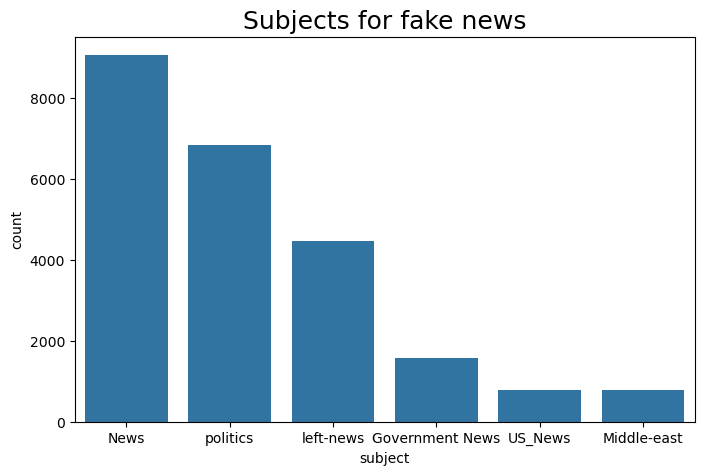

## Word Clouds for News Titles<a href="#Word-Clouds-for-News-Titles" class="anchor-link">¶</a>

Word Cloud using the **Valid News Titles** in order to see the **most common** key words valid news titles use.

In \[13\]:

    plt.figure(figsize = (20,20))
    wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df_all[df_all.label == 1].processed_title))
    plt.imshow(wc, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.title('Word Cloud of Real News Titles', size=18);

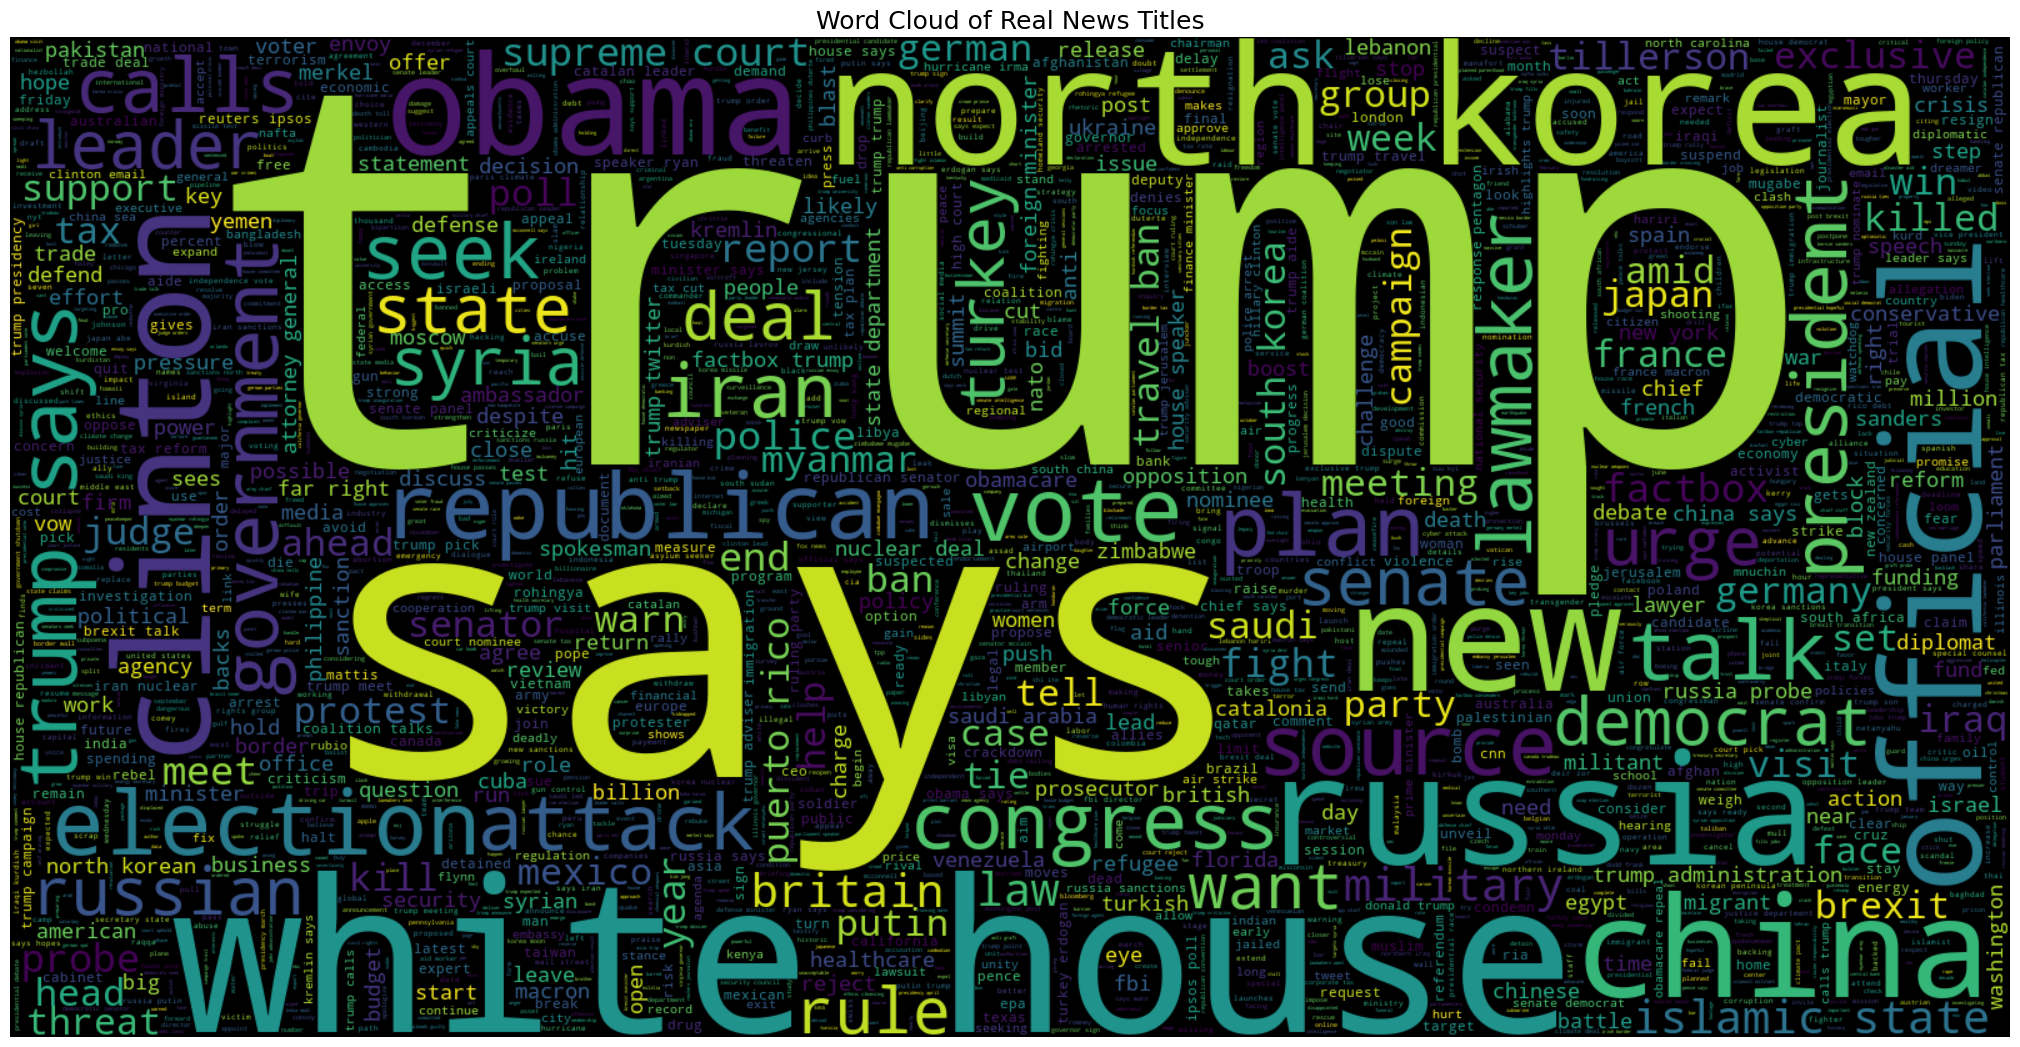

Same with the **Fake News Titles**.

In \[14\]:

    plt.figure(figsize = (20,20))
    wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df_all[df_all.label == 0].processed_title))
    plt.imshow(wc, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.title('Word Cloud of Fake News Titles', size=18);

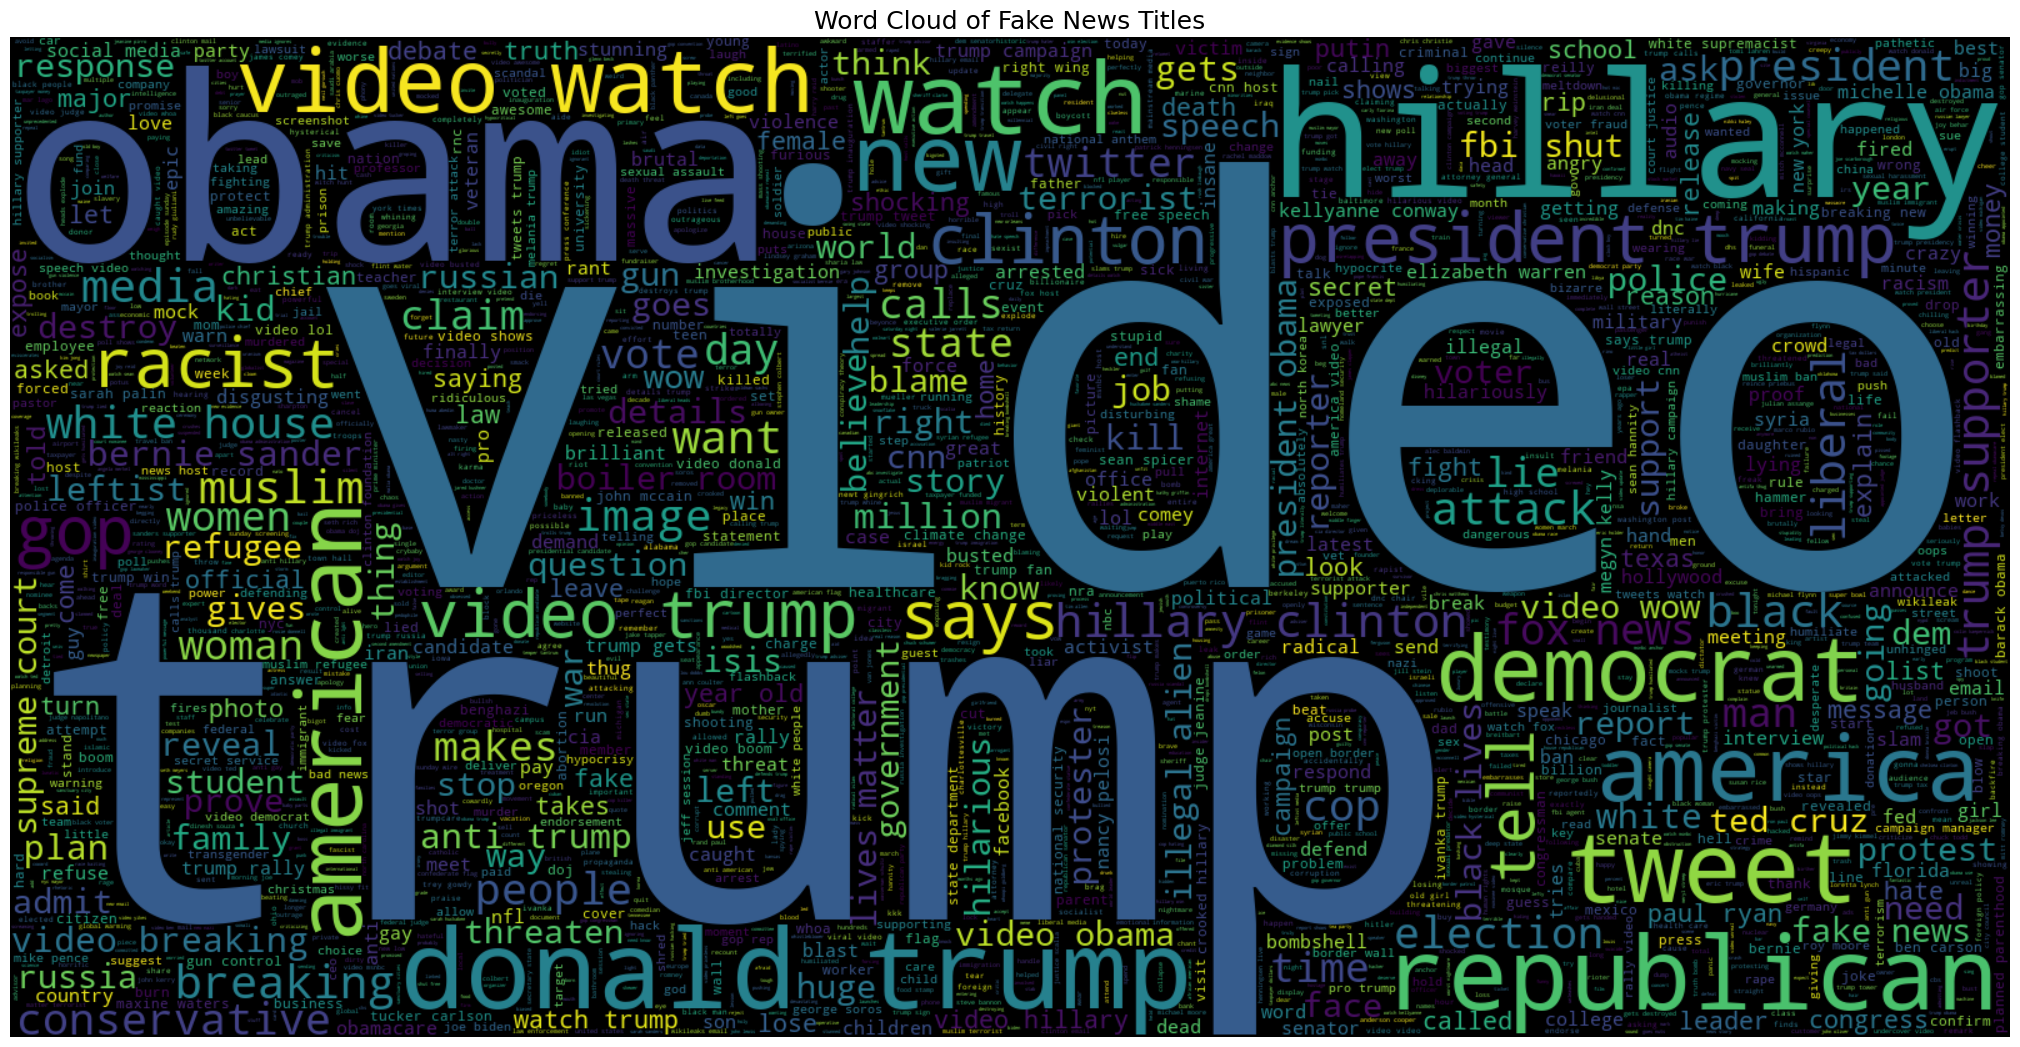

**Observation**: As we can see Fake and Valid News **share some frequently used words** such as "trump", "obama", "clinton", "says" etc. Therefore we can not **decide** with **absolute certainty** whether a news article is fake or not. However as we can see, there are some words which **can describe and characterize** the content of the certain news article and it's credibility.

## Average Number of Characters in Titles and Texts<a href="#Average-Number-of-Characters-in-Titles-and-Texts" class="anchor-link">¶</a>

Plot the **average number of characters** in valid and fake news **titles**...

In \[15\]:

    # Calculate number of characters (excluding spaces) in valid news titles
    char_counts = [(len(x) - x.count(' ')) for x in df_all[df_all.label == 1].title]

    # Create histogram
    plt.figure(figsize=(10, 6))
    plt.hist(char_counts, bins=30, color='mediumseagreen', edgecolor='black')
    plt.title("Average Number of Characters in Valid News Titles")
    plt.xlabel("Character Count (excluding spaces)")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig("valid_title_characters.png")
    plt.show()

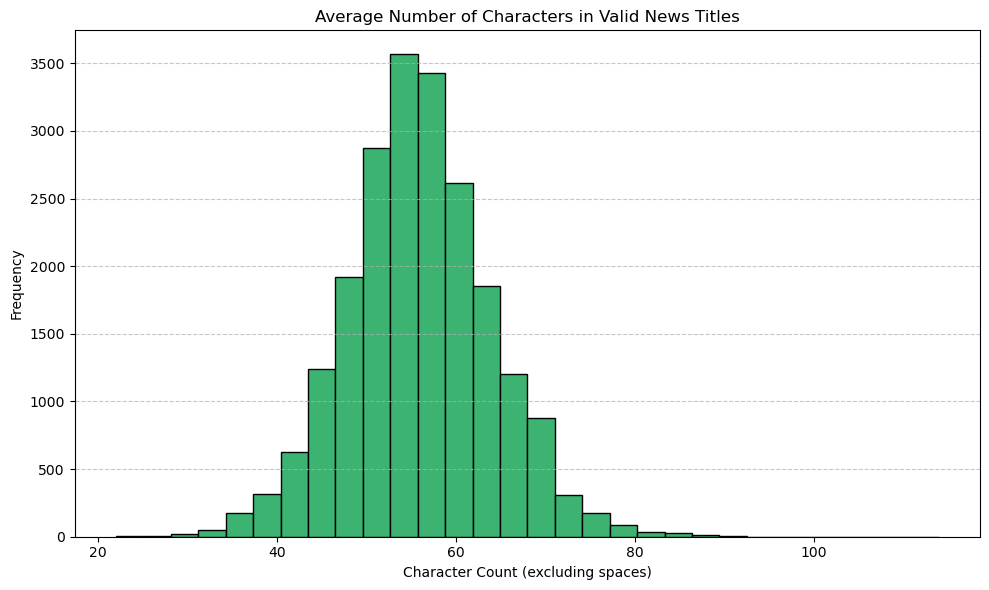

In \[16\]:

    # Calculate character counts (excluding spaces) for Fake News titles
    char_counts = [(len(x) - x.count(' ')) for x in df_all[df_all.label == 0].title]

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    n, bins, patches = plt.hist(char_counts, bins=30, color='salmon', edgecolor='black')

    # Add frequency labels on top of each bar
    for count, bin_left, bin_right in zip(n, bins[:-1], bins[1:]):
        plt.text((bin_left + bin_right)/2, count, str(int(count)),
                 ha='center', va='bottom', fontsize=8, rotation=45)

    # Add titles and labels
    plt.title("Distribution of Character Counts in Fake News Titles")
    plt.xlabel("Number of Characters (excluding spaces)")
    plt.ylabel("Number of Titles")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig("fake_news_characters.png")
    plt.show()

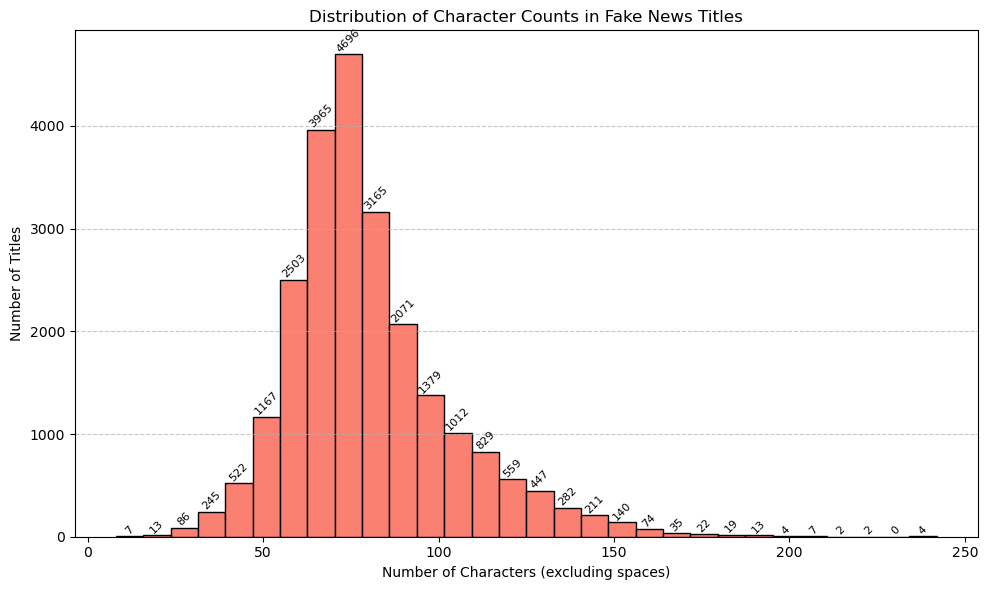

**Observation**: On average, the maximum number of **characters in titles** of **valid** **news** range between \$52-58\$ characters whereas the maximum number of **characters in titles** of **fake** **news** range between \$70-79\$ characters. Would be a bit tricky to judge if the news are true or fake **only by the number of characters** in their **titles**. So lets continue until we find a better distinguishing factor.

Lets do the **same** with the **news text** and check whether we can find a usefull pattern...

In \[17\]:

    # Calculate character counts (excluding spaces) for Valid News text
    char_counts_valid = [(len(x) - x.count(' ')) for x in df_all[df_all.label == 1].text]

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    n, bins, patches = plt.hist(char_counts_valid, bins=30, color='mediumseagreen', edgecolor='black')

    # Add frequency labels on top of each bar
    for count, bin_left, bin_right in zip(n, bins[:-1], bins[1:]):
        plt.text((bin_left + bin_right) / 2, count, str(int(count)),
                 ha='center', va='bottom', fontsize=8, rotation=45)

    # Add titles and axis labels
    plt.title("Average Number of Characters in Valid News Text")
    plt.xlabel("Number of Characters (excluding spaces)")
    plt.ylabel("Number of Articles")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig("valid_news_text_characters.png")
    plt.show()

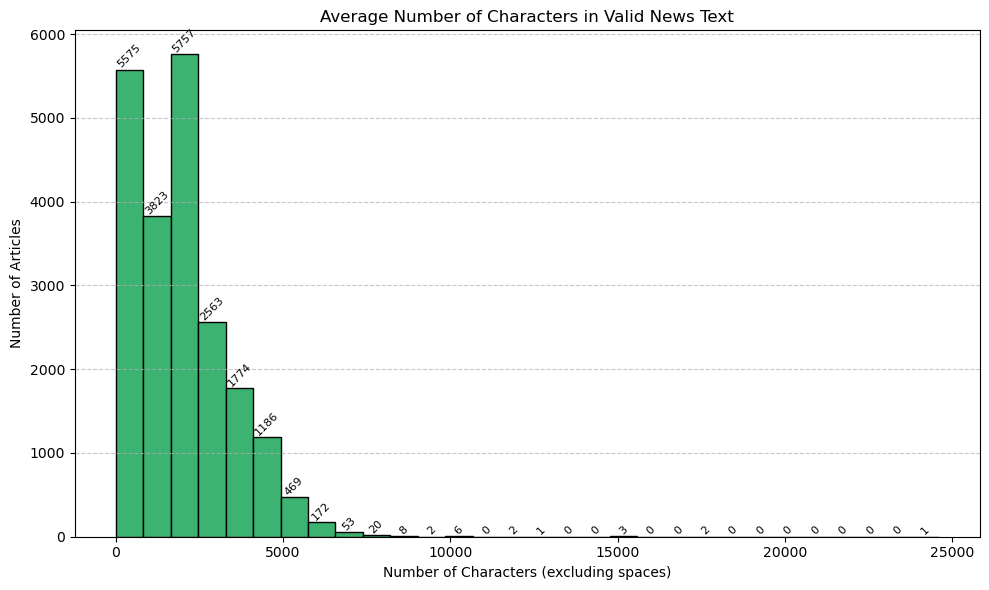

In \[18\]:

    # Calculate character counts (excluding spaces) for Fake News text
    char_counts_fake = [(len(x) - x.count(' ')) for x in df_all[df_all.label == 0].text]

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    n, bins, patches = plt.hist(char_counts_fake, bins=30, color='tomato', edgecolor='black')

    # Add frequency labels on top of each bar
    for count, bin_left, bin_right in zip(n, bins[:-1], bins[1:]):
        plt.text((bin_left + bin_right) / 2, count, str(int(count)),
                 ha='center', va='bottom', fontsize=8, rotation=45)

    # Add titles and axis labels
    plt.title("Average Number of Characters in Fake News Text")
    plt.xlabel("Number of Characters (excluding spaces)")
    plt.ylabel("Number of Articles")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig("fake_news_text_characters.png")
    plt.show()

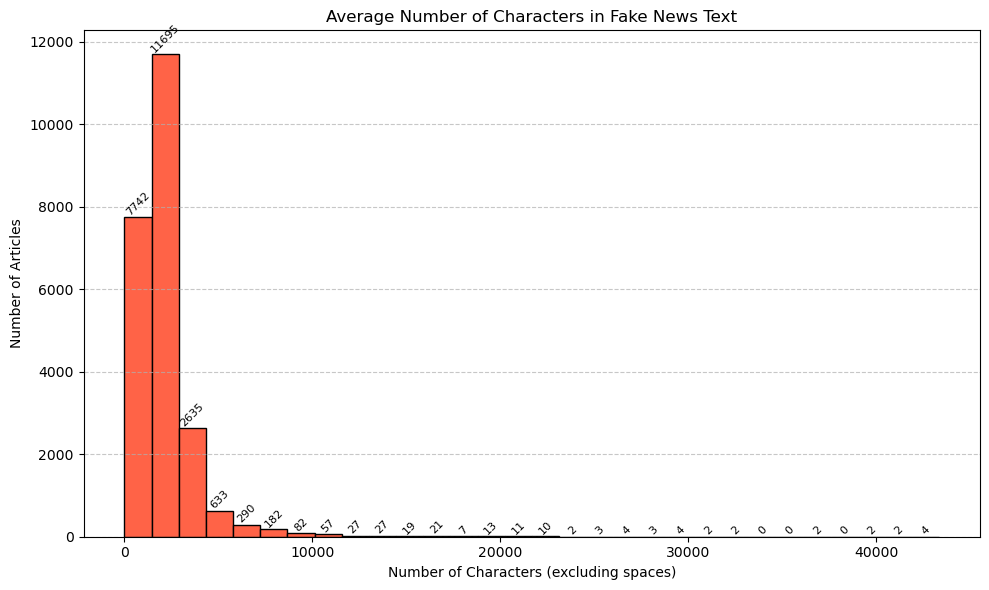

**Observation**: On average again, the maximum number of **characters in texts** of **valid** **news** range between \$300-500\$ characters whereas the maximum number of **characters in texts** of **fake** **news** range between \$1500-1900\$ characters. There is a **clear difference** here regarding the length of the words of the news articles. We **also** observe that **some fake news** articles have a little to none characters, which is an interesting pattern.

## Average Number of Words in Titles and Text<a href="#Average-Number-of-Words-in-Titles-and-Text" class="anchor-link">¶</a>

Plot the **average number of words** in valid and fake news **titles**...

In \[19\]:

    # Calculate word counts for Valid News titles
    word_counts_valid_titles = [len(x.split(" ")) for x in df_all[df_all.label == 1].title]

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    n, bins, patches = plt.hist(word_counts_valid_titles, bins=20, color='steelblue', edgecolor='black')

    # Add frequency labels on top of each bar
    for count, bin_left, bin_right in zip(n, bins[:-1], bins[1:]):
        plt.text((bin_left + bin_right) / 2, count, str(int(count)),
                 ha='center', va='bottom', fontsize=8, rotation=45)

    # Add titles and axis labels
    plt.title("Average Number of Words in Valid News Titles")
    plt.xlabel("Number of Words")
    plt.ylabel("Number of Titles")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig("valid_news_title_wordcount.png")
    plt.show()

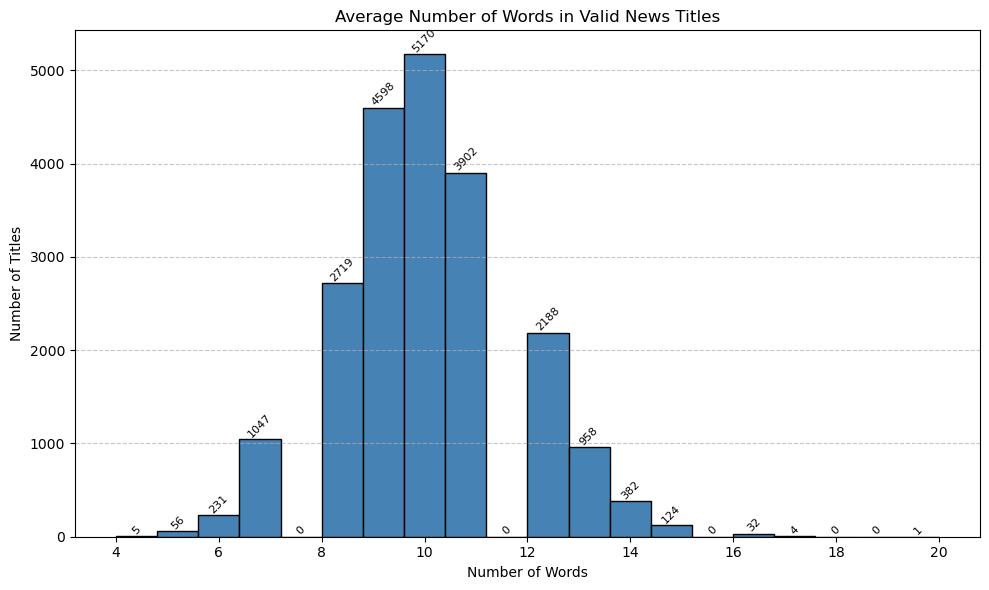

In \[20\]:

    # Calculate word counts for Fake News titles
    word_counts_fake_titles = [len(x.split(" ")) for x in df_all[df_all.label == 0].title]

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    n, bins, patches = plt.hist(word_counts_fake_titles, bins=20, color='orange', edgecolor='black')

    # Add frequency labels on top of each bar
    for count, bin_left, bin_right in zip(n, bins[:-1], bins[1:]):
        plt.text((bin_left + bin_right) / 2, count, str(int(count)),
                 ha='center', va='bottom', fontsize=8, rotation=45)

    # Add titles and axis labels
    plt.title("Average Number of Words in Fake News Titles")
    plt.xlabel("Number of Words")
    plt.ylabel("Number of Titles")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig("fake_news_title_wordcount.png")
    plt.show()

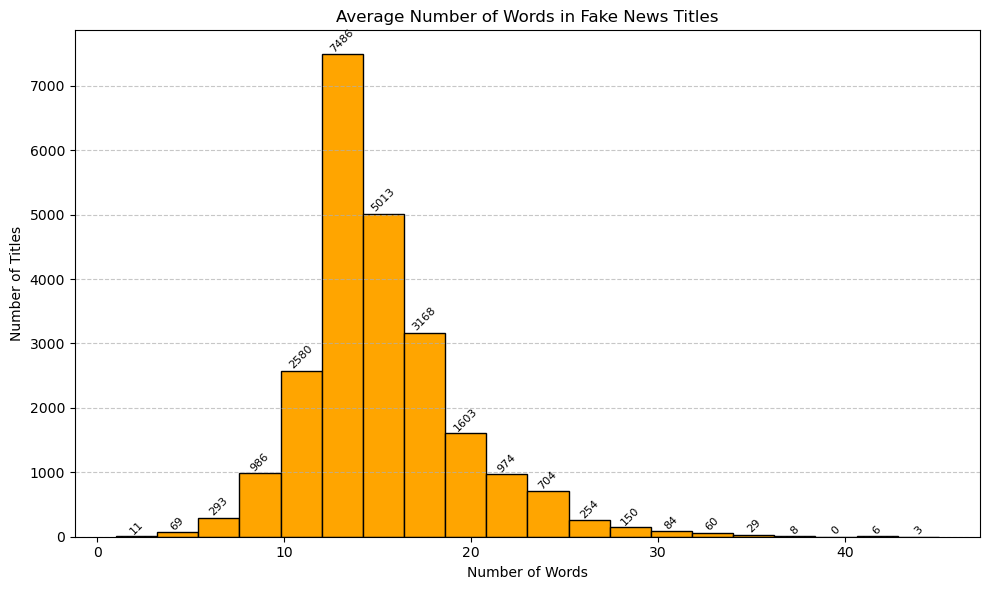

**Observation**: On average, the maximum number **of words in titles** of **valid** **news** range between \$9-11\$ words whereas the maximum number **of words in titles** of **fake** **news** range between \$13-16\$ words. Would be a bit tricky to judge if the news are true or fake **only by the number of words** in their **titles**.

Some titles of **fake news** may have more words making the title **provocative** or **attractive** for the person to read. This is a common practice for fake news publishers but we still can not be sure just by the article's title length.

Lets do the **same** with the **news text** and check whether we can find a usefull pattern...

In \[21\]:

    # Calculate word counts for Valid News text
    word_counts_valid_text = [len(x.split(" ")) for x in df_all[df_all.label == 1].text]

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    n, bins, patches = plt.hist(word_counts_valid_text, bins=30, color='mediumseagreen', edgecolor='black')

    # Add frequency labels on top of each bar
    for count, bin_left, bin_right in zip(n, bins[:-1], bins[1:]):
        plt.text((bin_left + bin_right) / 2, count, str(int(count)),
                 ha='center', va='bottom', fontsize=8, rotation=45)

    # Add titles and axis labels
    plt.title("Average Number of Words in Valid News Text")
    plt.xlabel("Number of Words")
    plt.ylabel("Number of Articles")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig("valid_news_text_wordcount.png")
    plt.show()

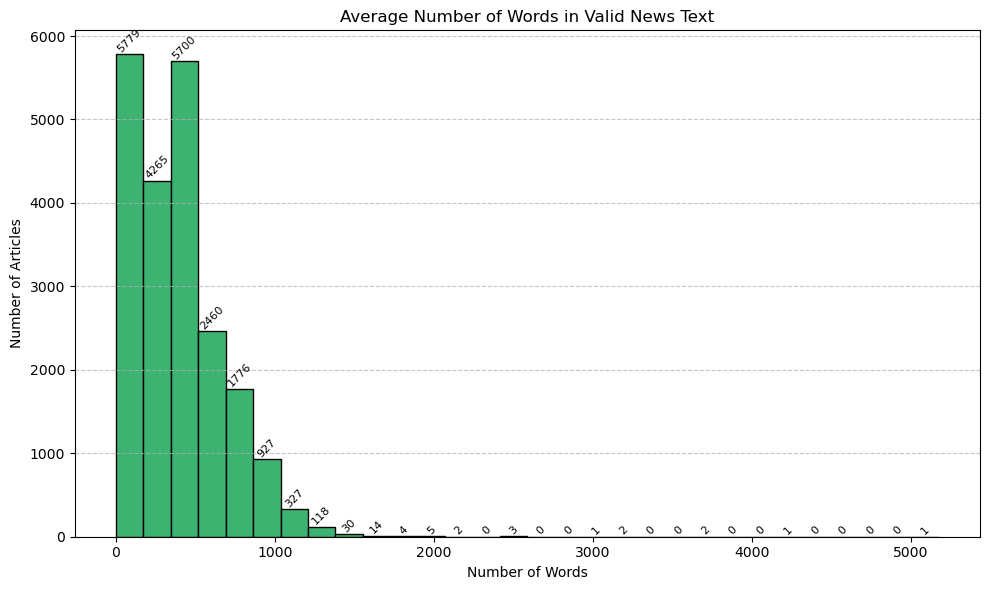

In \[22\]:

    # Calculate word counts for Fake News text
    word_counts_fake_text = [len(x.split(" ")) for x in df_all[df_all.label == 0].text]

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    n, bins, patches = plt.hist(word_counts_fake_text, bins=30, color='tomato', edgecolor='black')

    # Add frequency labels on top of each bar
    for count, bin_left, bin_right in zip(n, bins[:-1], bins[1:]):
        plt.text((bin_left + bin_right) / 2, count, str(int(count)),
                 ha='center', va='bottom', fontsize=8, rotation=45)

    # Add titles and axis labels
    plt.title("Average Number of Words in Fake News Text")
    plt.xlabel("Number of Words")
    plt.ylabel("Number of Articles")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig("fake_news_text_wordcount.png")
    plt.show()

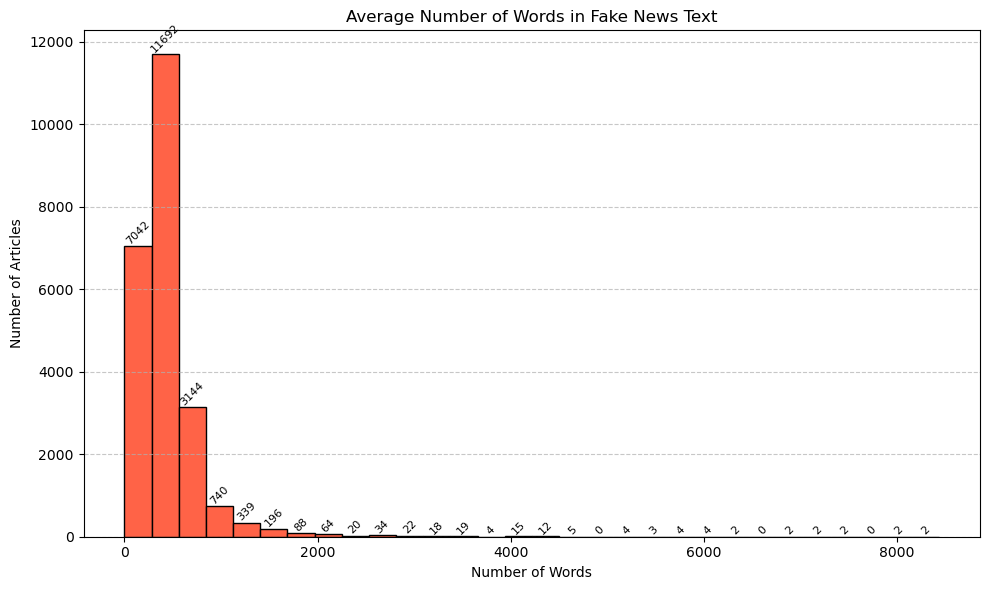

**Observation**: On average again, the maximum **number of words in texts** of **valid** **news** range between \$60-100\$ and \$400-420\$ words whereas the maximum **number of words in texts** of fake news range between \$0-20\$ and \$310-370\$ words. There is a **clear difference** here regarding the length of the news articles.

**Observation**: As we can see **fake** **news** tend to keep their articles a bit **short** **in size** including **few and large words**, whereas **valid** **news** have **more** **words** in their text, which seem to be more **common** and **simple** for the user to read, informing him and providing valid information with sources and examples.

This goes to show that fake news tend to elongate their articles with **incomprehensible** **long** **words**, **obsuring and distorting** the content of the article and **misinforming** the reader. On the other hand, non-fake news keep their articles **simple** and **easy to read**, while also providing more **information**, **examples**, **reliable sources** etc.

## Average Number of Modyfied Words in Titles and Text<a href="#Average-Number-of-Modyfied-Words-in-Titles-and-Text" class="anchor-link">¶</a>

Lets observe the above graphs after **removing the stop-words and processing** the titles and texts...

In \[23\]:

    # Calculate word counts for Valid News processed titles
    word_counts_valid_processed_titles = [len(x.split(" ")) for x in df_all[df_all.label == 1].processed_title]

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    n, bins, patches = plt.hist(word_counts_valid_processed_titles, bins=20, color='seagreen', edgecolor='black')

    # Add frequency labels on top of each bar
    for count, bin_left, bin_right in zip(n, bins[:-1], bins[1:]):
        plt.text((bin_left + bin_right) / 2, count, str(int(count)),
                 ha='center', va='bottom', fontsize=8, rotation=45)

    # Add titles and axis labels
    plt.title("Average Number of Words in Valid News Titles after Modifying Them")
    plt.xlabel("Number of Words")
    plt.ylabel("Number of Titles")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig("valid_processed_titles_wordcount.png")
    plt.show()

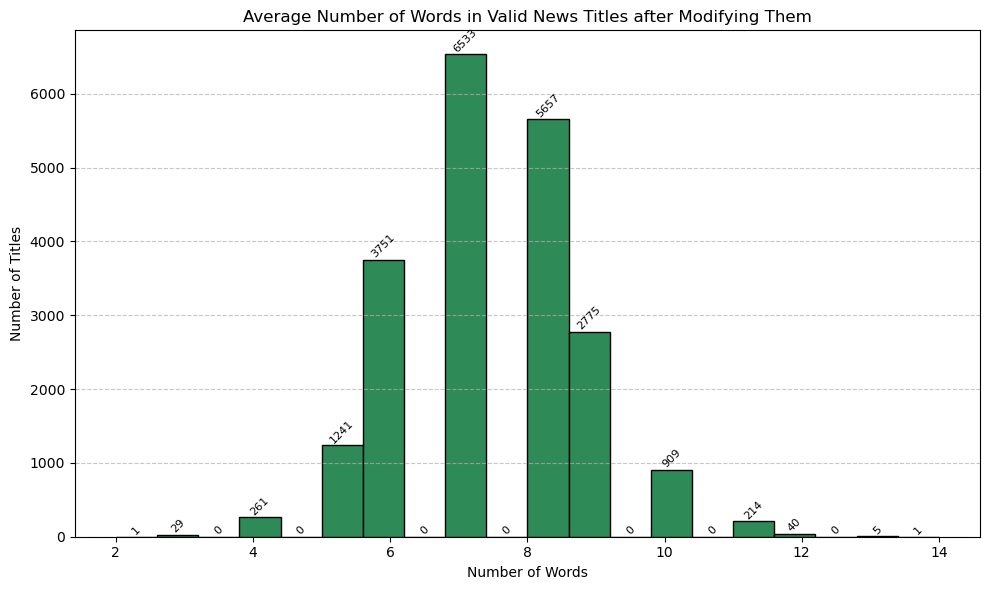

In \[24\]:

    # Calculate word counts for Fake News processed titles
    word_counts_fake_processed_titles = [len(x.split(" ")) for x in df_all[df_all.label == 0].processed_title]

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    n, bins, patches = plt.hist(word_counts_fake_processed_titles, bins=20, color='darkorange', edgecolor='black')

    # Add frequency labels on top of each bar
    for count, bin_left, bin_right in zip(n, bins[:-1], bins[1:]):
        plt.text((bin_left + bin_right) / 2, count, str(int(count)),
                 ha='center', va='bottom', fontsize=8, rotation=45)

    # Add titles and axis labels
    plt.title("Average Number of Words in Fake News Titles after Modifying Them")
    plt.xlabel("Number of Words")
    plt.ylabel("Number of Titles")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig("fake_processed_titles_wordcount.png")
    plt.show()

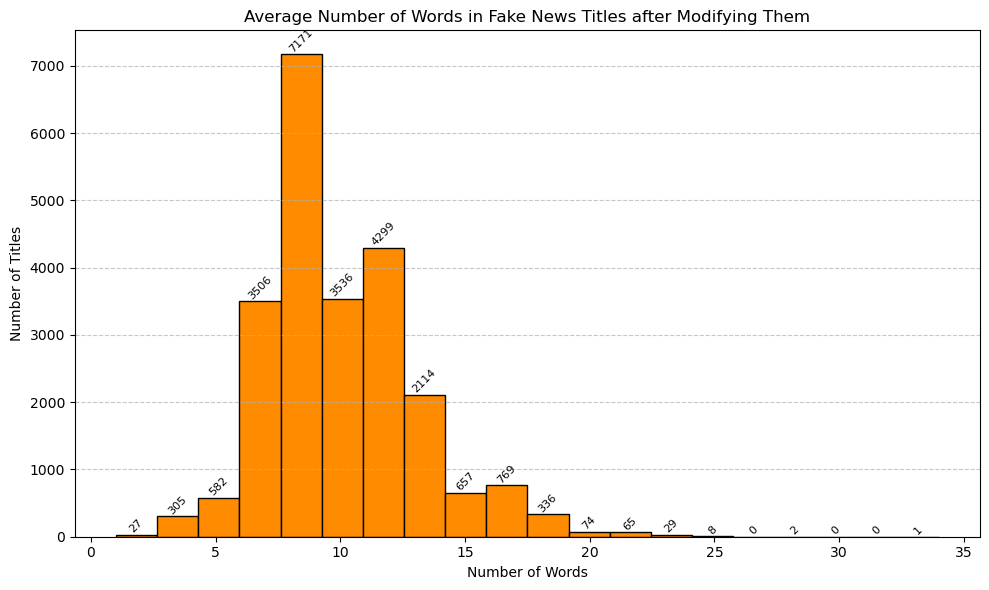

In \[25\]:

    # Calculate word counts for Valid News processed text
    word_counts_valid_processed_text = [len(x.split(" ")) for x in df_all[df_all.label == 1].processed_text]

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    n, bins, patches = plt.hist(word_counts_valid_processed_text, bins=30, color='mediumseagreen', edgecolor='black')

    # Add frequency labels on top of each bar
    for count, bin_left, bin_right in zip(n, bins[:-1], bins[1:]):
        plt.text((bin_left + bin_right) / 2, count, str(int(count)),
                 ha='center', va='bottom', fontsize=8, rotation=45)

    # Add titles and axis labels
    plt.title("Average Number of Words in Valid News Text after Modifying Them")
    plt.xlabel("Number of Words")
    plt.ylabel("Number of Articles")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig("valid_processed_text_wordcount.png")
    plt.show()

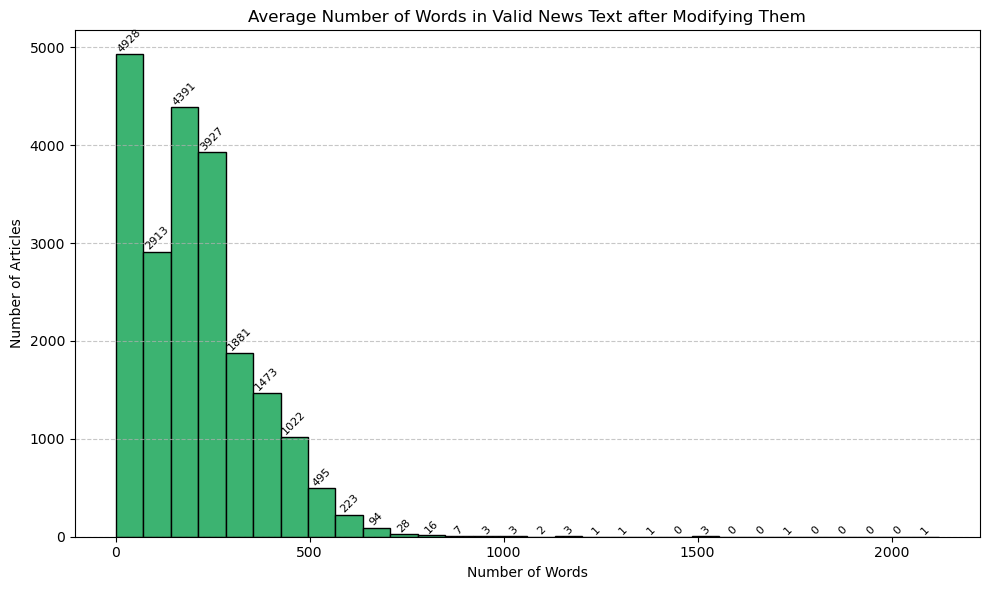

In \[26\]:

    # Calculate word counts for Fake News processed text
    word_counts_fake_processed_text = [len(x.split(" ")) for x in df_all[df_all.label == 0].processed_text]

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    n, bins, patches = plt.hist(word_counts_fake_processed_text, bins=30, color='indianred', edgecolor='black')

    # Add frequency labels on top of each bar
    for count, bin_left, bin_right in zip(n, bins[:-1], bins[1:]):
        plt.text((bin_left + bin_right) / 2, count, str(int(count)),
                 ha='center', va='bottom', fontsize=8, rotation=45)

    # Add titles and axis labels
    plt.title("Average Number of Words in Fake News Text after Modifying Them")
    plt.xlabel("Number of Words")
    plt.ylabel("Number of Articles")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig("fake_processed_text_wordcount.png")
    plt.show()

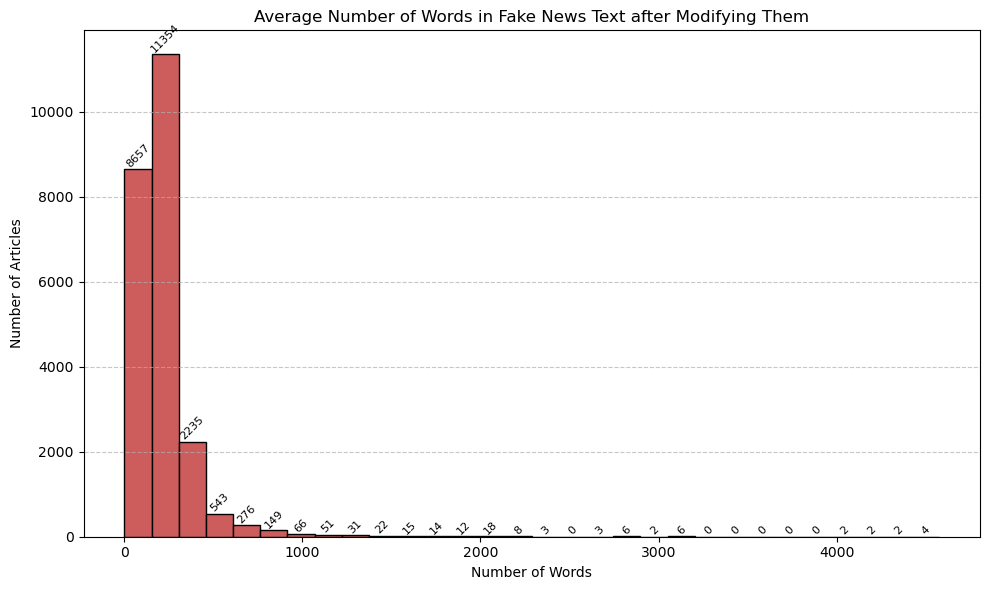

**Observation**: The patterns **are the same** even after removing stop-words and modyfing the titles and text.

## Common Bigrams in Titles and Text<a href="#Common-Bigrams-in-Titles-and-Text" class="anchor-link">¶</a>

Lets see the **most common continuous sequence of 2 items** from the given **title** and **text** (valid and fake news).

In \[27\]:

    # Get the valid news title words
    true_title_words = [x.split(' ') for x in df_all[df_all.label == 1].processed_title]
    # Flatten the list
    true_title_words = [item for sublist in true_title_words for item in sublist]

    # Get the bigrams
    bigram_all = (pd.Series(ngrams(true_title_words, 2)).value_counts())[:10]
    bigram_all=pd.DataFrame(bigram_all)

    print("Top 10 most common bigrams in Valid News Titles: ")
    bigram_all

    Top 10 most common bigrams in Valid News Titles: 

Out\[27\]:

|                         | count |
|-------------------------|-------|
| (white, house)          | 790   |
| (north, korea)          | 720   |
| (trump, says)           | 364   |
| (islamic, state)        | 251   |
| (supreme, court)        | 235   |
| (puerto, rico)          | 178   |
| (south, korea)          | 160   |
| (says, trump)           | 159   |
| (travel, ban)           | 156   |
| (trump, administration) | 148   |

In \[28\]:

    # Get the fake news title words
    fake_title_words = [x.split(' ') for x in df_all[df_all.label == 0].processed_title]
    # Flatten the list
    fake_title_words = [item for sublist in fake_title_words for item in sublist]

    # Get the bigrams
    bigram_all = (pd.Series(ngrams(fake_title_words, 2)).value_counts())[:10]
    bigram_all=pd.DataFrame(bigram_all)

    print("Top 10 most common bigrams in Fake News Titles: ")
    bigram_all

    Top 10 most common bigrams in Fake News Titles: 

Out\[28\]:

|                    | count |
|--------------------|-------|
| (donald, trump)    | 805   |
| (video, watch)     | 509   |
| (president, trump) | 504   |
| (video, trump)     | 460   |
| (hillary, clinton) | 417   |
| (white, house)     | 348   |
| (fox, news)        | 314   |
| (trump, video)     | 311   |
| (video, breaking)  | 270   |
| (anti, trump)      | 261   |

In \[29\]:

    # Get the valid news text words
    true_text_words = [x.split(' ') for x in df_all[df_all.label == 1].processed_text]
    # Flatten the list
    true_text_words = [item for sublist in true_text_words for item in sublist]

    # Get the bigrams
    bigram_all = (pd.Series(ngrams(true_text_words, 2)).value_counts())[:10]
    bigram_all=pd.DataFrame(bigram_all)

    print("Top 10 most common bigrams in Valid News Text: ")
    bigram_all

    Top 10 most common bigrams in Valid News Text: 

Out\[29\]:

|                       | count |
|-----------------------|-------|
| (united, states)      | 12204 |
| (donald, trump)       | 10168 |
| (white, house)        | 8419  |
| (washington, reuters) | 6679  |
| (president, donald)   | 5930  |
| (north, korea)        | 5659  |
| (new, york)           | 4740  |
| (prime, minister)     | 4163  |
| (said, statement)     | 3934  |
| (trump, said)         | 3586  |

In \[30\]:

    # Get the fake news text words
    fake_text_words = [x.split(' ') for x in df_all[df_all.label == 0].processed_text]
    # Flatten the list
    fake_text_words = [item for sublist in fake_text_words for item in sublist]

    # Get the bigrams
    bigram_all = (pd.Series(ngrams(fake_text_words, 2)).value_counts())[:10]
    bigram_all=pd.DataFrame(bigram_all)

    print("Top 10 most common bigrams in Fake News Text: ")
    bigram_all

    Top 10 most common bigrams in Fake News Text: 

Out\[30\]:

|                    | count |
|--------------------|-------|
| (donald, trump)    | 16395 |
| (featured, image)  | 8063  |
| (hillary, clinton) | 7307  |
| (white, house)     | 6745  |
| (united, states)   | 6663  |
| (twitter, com)     | 6567  |
| (pic, twitter)     | 6232  |
| (new, york)        | 4359  |
| (president, obama) | 4095  |
| (president, trump) | 4049  |

## Model Training and Classification<a href="#Model-Training-and-Classification" class="anchor-link">¶</a>

### Create Train and Test Datasets<a href="#Create-Train-and-Test-Datasets" class="anchor-link">¶</a>

In \[31\]:

    import os
    import shutil

    # creating new csv files
    # getting a percentage (fraction) of all the news using frac argument with random choices, use frac=1 for whole dataset
    sampled = df_all.sample(frac=1, random_state=7,replace=True)

    # split train and test dataframes
    position = int(sampled.shape[0] * 0.8)
    train = sampled.iloc[:position]
    test = sampled.iloc[position:]

    # removing unwanted columns
    test = test.drop(columns=['original', 'text', 'title'])
    train = train.drop(columns=['original', 'text', 'title'])
    # renaming columns
    test = test.rename(columns={'processed_title': 'title', 'processed_text': 'text'})
    train = train.rename(columns={'processed_title': 'title', 'processed_text': 'text'})

    # saving...
    test.to_csv(r"test.csv")
    train.to_csv(r"train.csv")

    # Create the folder if it doesn't exist
    output_dir = r"D:\JupyterLab\FakeNews-Classification-main\Saved Train Testt"
    os.makedirs(output_dir, exist_ok=True)

    shutil.copy("test.csv", r"D:\JupyterLab\FakeNews-Classification-main\Saved Train Test\test.csv")
    shutil.copy("train.csv", r"D:\JupyterLab\FakeNews-Classification-main\Saved Train Test\train.csv")

Out\[31\]:

    'D:\\JupyterLab\\FakeNews-Classification-main\\Saved Train Test\\train.csv'

Now the train and test datasets have been created, let's check their analogies and their sizes.

In \[32\]:

    # printing the sizes of the dataframes
    print("Number of news in TEST dataset is -> ", test.shape[0])
    print("Number of news in TRAIN dataset is -> ", train.shape[0], "\n")

    print("The number of the FAKE news in the TRAIN dataset is -> " + str(train[train.label == 0].shape[0]))
    print("The number of the TRUE news in the TRAIN dataset is -> " + str(train[train.label == 1].shape[0]))
    print("Analogy of real-fake news is -> " + str(round((train[train.label == 0].shape[0]/train.shape[0])*100,2)) + "% - " + str(round((train[train.label == 1].shape[0]/train.shape[0])*100,2)) +"%")
    print("")
    print("The number of the FAKE news in the TEST dataset is -> " + str(test[test.label == 0].shape[0]))
    print("The number of the TRUE news in the TEST dataset is -> " + str(test[test.label == 1].shape[0]))
    print("Analogy of real-fake news is -> " + str(round((test[test.label == 0].shape[0]/test.shape[0])*100,2)) + "% - " + str(round((test[test.label == 1].shape[0]/test.shape[0])*100,2)) +"%")

    Number of news in TEST dataset is ->  8980
    Number of news in TRAIN dataset is ->  35918 

    The number of the FAKE news in the TRAIN dataset is -> 18797
    The number of the TRUE news in the TRAIN dataset is -> 17121
    Analogy of real-fake news is -> 52.33% - 47.67%

    The number of the FAKE news in the TEST dataset is -> 4624
    The number of the TRUE news in the TEST dataset is -> 4356
    Analogy of real-fake news is -> 51.49% - 48.51%

## News Classification<a href="#News-Classification" class="anchor-link">¶</a>

### Needed Funtions<a href="#Needed-Funtions" class="anchor-link">¶</a>

In \[33\]:

    def document_vector(doc, w2v):
      # Create document vectors by averaging word vectors
      doc = doc.split(' ')
      doc = [word for word in doc if word in w2v.wv.vocab]

      return np.mean(w2v[doc], axis=0)

In \[34\]:

    def ignore_warnings():
      # ignore the deprecassion warning
      warnings.filterwarnings("ignore")

In \[35\]:

    def enable_warnings():
      warnings.simplefilter('always')

## 6. Baseline Performance<a href="#6.-Baseline-Performance" class="anchor-link">¶</a>

Establishing a baseline is essential to gauge the effectiveness of more advanced models. In this coursework a logistic Regression, Naive Bayes, SVM and Random Forest classification were evaluated. Texts were vectorized using the CountVectorizer, TfidfVectorizer and Word2Vec Baseline models. Standard evaluation metrics (accuracy, F1 score) were used to assess performance.

In \[36\]:

    # Updated document_vector function for Gensim 4.0.0+
    def document_vector(doc, model):
        # Remove out-of-vocabulary words
        doc = [word for word in doc.split() if word in model.wv.key_to_index]
        
        if len(doc) == 0:
            # If no words are in vocabulary, return a vector of zeros
            return np.zeros(model.vector_size)
        
        # Return the mean of the word vectors for words in the document
        return np.mean([model.wv[word] for word in doc], axis=0)

    ignore_warnings()

    # COUNT VECTORIZER
    CountVec = CountVectorizer(
                            ngram_range=(1,2),
                            lowercase=True
                            )
    # Initializing some parameters one time to be used by BOW implementation models
    vec_train = CountVec.fit(train.text)
    X_vec_train = vec_train.transform(train.text)
    X_vec_test = vec_train.transform(test.text)

    # TF-IDF VECTORIZER
    tf_idf_vec = TfidfVectorizer(
                          use_idf=True,
                          ngram_range=(1,2),
                          smooth_idf=True,
                          lowercase=True
                          )
    # Initializing some parameters one time to be used by TF-IDF implementation models
    vec_train_tf = tf_idf_vec.fit(train.text)
    X_vec_train_tf = vec_train_tf.transform(train.text)
    X_vec_test_tf = vec_train_tf.transform(test.text)

    # Word2Vec VECTORIZER
    # creating a list of words from the titles
    X = [x.split(' ') for x in train.text]

    EMBEDDING_DIM = 100
    # creating the w2v model
    w2v = gensim.models.Word2Vec(sentences=X, vector_size=EMBEDDING_DIM, window=5, min_count=1)
    # creating temp dataframes
    trainTemp = train
    testTemp = test

    # applying the function and creating a new column
    trainTemp['doc_vector'] = trainTemp.text.apply(document_vector, args=(w2v,))
    testTemp['doc_vector'] = testTemp.text.apply(document_vector, args=(w2v,))

    X_train = list(trainTemp['doc_vector'])
    X_test = list(testTemp['doc_vector'])

    y_train = train.label
    y_test = test.label

### Logistic Regression<a href="#Logistic-Regression" class="anchor-link">¶</a>

In \[37\]:

    def LogisticRegressionCountImplementation(train, test):
      model = LogisticRegression(C=2.5)

      model.fit(X_vec_train, train.label)

      predicted_value = model.predict(X_vec_test)

      accuracy_value = roc_auc_score(test.label, predicted_value)
      print("Accuracy -> " + str(round(accuracy_value*100,2)) + "%")
      print("f1 score -> " + str(f1_score(test.label,predicted_value)))

In \[38\]:

    def LogisticRegressionTfidfImplementation(train, test):
      model = LogisticRegression(C=2.5)

      model.fit(X_vec_train_tf, train.label)

      predicted_value = model.predict(X_vec_test_tf)

      accuracy_value = roc_auc_score(test.label, predicted_value)
      print("Accuracy -> " + str(round(accuracy_value*100,2)) + "%")
      print("f1 score -> " + str(f1_score(test.label,predicted_value)))

In \[39\]:

    def LogisticRegressionWord2VecImplementation(train, test):
      model = LogisticRegression(C=100)

      model.fit(X_train, train.label)

      predicted_value = model.predict(X_test)

      accuracy_value = roc_auc_score(test.label, predicted_value)
      print("Accuracy -> " + str(round(accuracy_value*100,2)) + "%")
      print("f1 score -> " + str(f1_score(test.label,predicted_value)))

In \[40\]:

    print("Logistic Regression with BOW, Tf-Idf and Word2Vec accordingly")
    ignore_warnings()
    LogisticRegressionCountImplementation(train, test)
    LogisticRegressionTfidfImplementation(train,test)
    LogisticRegressionWord2VecImplementation(train,test)
    enable_warnings()

    Logistic Regression with BOW, Tf-Idf and Word2Vec accordingly
    Accuracy -> 99.79%
    f1 score -> 0.99781935039596
    Accuracy -> 99.09%
    f1 score -> 0.9905132015087439
    Accuracy -> 96.45%
    f1 score -> 0.9635053197574648

### Naive Bayes<a href="#Naive-Bayes" class="anchor-link">¶</a>

In \[41\]:

    def NaiveBayesCountImplementation(train, test):
      model = MultinomialNB(alpha=0.1)

      model.fit(X_vec_train, train.label)

      predicted_value = model.predict(X_vec_test)

      accuracy_value = roc_auc_score(test.label, predicted_value)
      print("Accuracy -> " + str(round(accuracy_value*100,2)) + "%")
      print("f1 score -> " + str(f1_score(test.label,predicted_value)))

In \[42\]:

    def NaiveBayesTfidfImplementation(train, test):
      model = MultinomialNB(alpha=0.1)

      model.fit(X_vec_train_tf, train.label)

      predicted_value = model.predict(X_vec_test_tf)

      accuracy_value = roc_auc_score(test.label, predicted_value)
      print("Accuracy -> " + str(round(accuracy_value*100,2)) + "%")
      print("f1 score -> " + str(f1_score(test.label,predicted_value)))

In \[43\]:

    def NaiveBayesWord2VecImplementation(train, test):

      model = MultinomialNB(alpha=0.1)

      # normalize values in X_train and X_test for the MultinomialNB
      # first we concatenate the two arrays into one...
      X_temp = np.concatenate((X_train, X_test))

      scaler = MinMaxScaler()
      # fit the scaler with the big array so that it finds the best minimum and maximum...
      scaler.fit(X_temp)
      # then transform the data
      X_temp = scaler.transform(X_temp)

      # then split the array again
      position = len(X_train)
      normalized_X_train, normalized_X_test = X_temp[:position, ...], X_temp[position:, ...]

      model.fit(normalized_X_train, train.label)

      predicted_value = model.predict(normalized_X_test)
      accuracy_value = roc_auc_score(test.label, predicted_value)
      print("Accuracy -> " + str(round(accuracy_value*100,2)) + "%")
      print("f1 score -> " + str(f1_score(test.label,predicted_value)))

In \[44\]:

    print("Naive Bayes with BOW, Tf-Idf and Word2Vec accordingly")
    ignore_warnings()
    NaiveBayesCountImplementation(train, test)
    NaiveBayesTfidfImplementation(train, test)
    NaiveBayesWord2VecImplementation(train,test)
    enable_warnings()

    Naive Bayes with BOW, Tf-Idf and Word2Vec accordingly
    Accuracy -> 98.73%
    f1 score -> 0.9868436105708729
    Accuracy -> 98.27%
    f1 score -> 0.9821632746398353
    Accuracy -> 88.26%
    f1 score -> 0.8741224885015735

### SVM<a href="#SVM" class="anchor-link">¶</a>

In \[45\]:

    def SVMCountImplementation(train, test):
      # SVM classifier
      classifier = SVC(kernel = 'linear', random_state = 0)
      classifier.fit(X_vec_train, y_train)

      # Predicting the Test set results
      y_pred = classifier.predict(X_vec_test)

      accuracy_value = roc_auc_score(test.label, y_pred)

      print("Accuracy -> " + str(round(accuracy_value*100,2)) + "%")
      print("f1 score -> " + str(f1_score(test.label,y_pred)))

In \[46\]:

    def SVMTfidfImplementation(train, test):
      # SVM Classifier
      classifier = SVC(kernel = 'linear', random_state = 0)
      classifier.fit(X_vec_train_tf, y_train)

      # Predicting the Test set results
      y_pred = classifier.predict(X_vec_test_tf)

      accuracy_value = roc_auc_score(test.label, y_pred)

      print("Accuracy -> " + str(round(accuracy_value*100,2)) + "%")
      print("f1 score -> " + str(f1_score(test.label,y_pred)))

In \[47\]:

    def SVMWord2VecImplementation(train, test):
      # SVM classifier
      classifier = SVC(kernel = 'linear', random_state = 0)
      classifier.fit(X_train, train.label)

      # Predicting the Test set results
      y_pred = classifier.predict(X_test)

      accuracy_value = roc_auc_score(test.label, y_pred)

      print("Accuracy -> " + str(round(accuracy_value*100,2)) + "%")
      print("f1 score -> " + str(f1_score(test.label,y_pred)))

In \[48\]:

    print("SVM with BOW, Tf-Idf and Word2Vec accordingly")
    ignore_warnings()
    SVMCountImplementation(train,test)
    SVMTfidfImplementation(train,test)
    SVMWord2VecImplementation(train,test)
    enable_warnings()

    SVM with BOW, Tf-Idf and Word2Vec accordingly
    Accuracy -> 99.81%
    f1 score -> 0.998049340218015
    Accuracy -> 99.52%
    f1 score -> 0.9949656750572082
    Accuracy -> 96.5%
    f1 score -> 0.9640369905240325

### Random Forest<a href="#Random-Forest" class="anchor-link">¶</a>

In \[49\]:

    def RandForestBowImplementation(train, test):
      # Random Forest classifier
      classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
      classifier.fit(X_vec_train, y_train)
      # Predicting the Test set results
      y_pred = classifier.predict(X_vec_test)

      accuracy_value = roc_auc_score(test.label, y_pred)

      print("Accuracy -> " + str(round(accuracy_value*100,2)) + "%")
      print("f1 score -> " + str(f1_score(test.label,y_pred)))

In \[50\]:

    def RandForestTfidfImplementation(train, test):
      # Random Forest classifier
      classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
      classifier.fit(X_vec_train_tf, y_train)
      # Predicting the Test set results
      y_pred = classifier.predict(X_vec_test)

      accuracy_value = roc_auc_score(test.label, y_pred)

      rf_acc_old = round(accuracy_value*100,2)

      print("Accuracy -> " + str(rf_acc_old) + "%")
      print("f1 score -> " + str(f1_score(test.label,y_pred)))

      return rf_acc_old

In \[51\]:

    def RandForestWord2VecImplementation(train, test):
      # Random forests classifier
      classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
      classifier.fit(X_train, train.label)

      # Predicting the Test set results
      y_pred = classifier.predict(X_test)

      accuracy_value = roc_auc_score(test.label, y_pred)

      print("Accuracy -> " + str(round(accuracy_value*100,2)) + "%")
      print("f1 score -> " + str(f1_score(test.label,y_pred)))

In \[52\]:

    print("Random Forest with BOW, Tf-Idf and Word2Vec accordingly")
    ignore_warnings()
    RandForestBowImplementation(train,test)
    # get the old accuracy...
    rf_acc_old = RandForestTfidfImplementation(train,test)
    RandForestWord2VecImplementation(train,test)
    enable_warnings()

    Random Forest with BOW, Tf-Idf and Word2Vec accordingly
    Accuracy -> 97.97%
    f1 score -> 0.9791065450767632
    Accuracy -> 95.98%
    f1 score -> 0.9585866697258231
    Accuracy -> 97.3%
    f1 score -> 0.9722510074841682

While all the models were computationally cheap and fast, their inability to capture semantic meaning and word order limited their performance. The baseline also demonstrated that simple statistical models can achieve good results on relatively clean and short text inputs, like news titles.

## 7. Comparative Classification Methodology<a href="#7.-Comparative-Classification-Methodology" class="anchor-link">¶</a>

I have chosen to improve the Random Forest Classifier with Tf-idf Vectorizer to compare with a Deep learning framework which will be **LSTM** model.

In \[53\]:

    def NewRandForestTfidfImplementation(train, test):
      # Random Forest classifier

      # Simple change to the parameters of the classifier...
      classifier = RandomForestClassifier(n_estimators= 150, max_depth=None, random_state= seed)
      classifier.fit(X_vec_train_tf, y_train)
      # Predicting the Test set results
      y_pred = classifier.predict(X_vec_test)

      accuracy_value = roc_auc_score(test.label, y_pred)

      rf_acc = round(accuracy_value*100,2)

      print("Accuracy -> " + str(rf_acc) + "%")
      print("f1 score -> " + str(f1_score(test.label,y_pred)))

      print("General scores: ")

      print(classification_report(test.label, y_pred))
      print(confusion_matrix(test.label, y_pred))

      return rf_acc

In \[54\]:

    seed = 4353

    rf_acc = NewRandForestTfidfImplementation(train,test)

    Accuracy -> 98.96%
    f1 score -> 0.9891762561239603
    General scores: 
                  precision    recall  f1-score   support

               0       1.00      0.98      0.99      4624
               1       0.98      1.00      0.99      4356

        accuracy                           0.99      8980
       macro avg       0.99      0.99      0.99      8980
    weighted avg       0.99      0.99      0.99      8980

    [[4544   80]
     [  15 4341]]

In \[55\]:

    model = ['Random Forest Old', 'Random Forest New']
    acc = [rf_acc_old, rf_acc]

    sns.set_style("whitegrid")
    plt.figure(figsize=(8,5))
    plt.yticks(np.arange(0,100,10))
    plt.ylabel("Test Accuracy %")
    plt.xlabel("Machine Learning Model")
    sns.barplot(x= model, y= acc)
    plt.show()

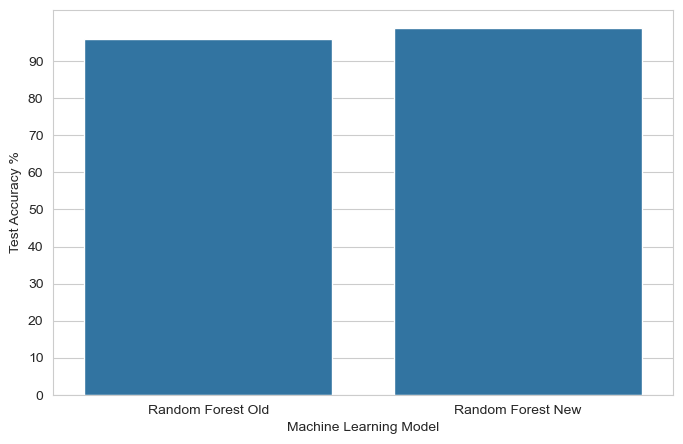

### Deep Learning (LSTM) model implementation<a href="#Deep-Learning-(LSTM)-model-implementation" class="anchor-link">¶</a>

In \[56\]:

    # Parameters
    MAX_NUM_WORDS = 10000
    MAX_SEQUENCE_LENGTH = 200
    EMBEDDING_DIM = 100

    # Tokenize and pad sequences
    tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token="<OOV>")
    tokenizer.fit_on_texts(train['text'])

    X_train_seq = tokenizer.texts_to_sequences(train['text'])
    X_test_seq = tokenizer.texts_to_sequences(test['text'])

    X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH)
    X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH)

    y_train_dl = train['label']
    y_test_dl = test['label']

    # Build the model
    model = Sequential([
        Embedding(MAX_NUM_WORDS, EMBEDDING_DIM),
        LSTM(64),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train_pad, y_train_dl, epochs=3, batch_size=128, validation_split=0.2)

    # Evaluate the model
    y_pred_prob = model.predict(X_test_pad)
    y_pred_dl = (y_pred_prob > 0.5).astype("int32")

    # Metrics
    dl_accuracy = roc_auc_score(y_test_dl, y_pred_dl)
    dl_f1 = f1_score(y_test_dl, y_pred_dl)

    print("Deep Learning (LSTM) Model Evaluation:")
    print("Accuracy -> {:.2f}%".format(dl_accuracy * 100))
    print("F1 Score -> {:.4f}".format(dl_f1))
    print("Classification Report:")
    print(classification_report(y_test_dl, y_pred_dl))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_dl, y_pred_dl))

    Epoch 1/3
    225/225 ━━━━━━━━━━━━━━━━━━━━ 85s 255ms/step - accuracy: 0.8655 - loss: 0.3104 - val_accuracy: 0.9734 - val_loss: 0.0921
    Epoch 2/3
    225/225 ━━━━━━━━━━━━━━━━━━━━ 59s 263ms/step - accuracy: 0.9817 - loss: 0.0654 - val_accuracy: 0.9859 - val_loss: 0.0497
    Epoch 3/3
    225/225 ━━━━━━━━━━━━━━━━━━━━ 59s 263ms/step - accuracy: 0.9926 - loss: 0.0283 - val_accuracy: 0.9875 - val_loss: 0.0493
    281/281 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step
    Deep Learning (LSTM) Model Evaluation:
    Accuracy -> 98.54%
    F1 Score -> 0.9850
    Classification Report:
                  precision    recall  f1-score   support

               0       0.98      0.99      0.99      4624
               1       0.99      0.98      0.99      4356

        accuracy                           0.99      8980
       macro avg       0.99      0.99      0.99      8980
    weighted avg       0.99      0.99      0.99      8980

    Confusion Matrix:
    [[4575   49]
     [  81 4275]]

### Comparison of Random Forest (TF-IDF) and LSTM (Embedding)<a href="#Comparison-of-Random-Forest-(TF-IDF)-and-LSTM-(Embedding)" class="anchor-link">¶</a>

In \[57\]:

    # Define metrics for both models
    metrics = {
        "Model": ["Random Forest (TF-IDF)", "LSTM (Embedding)"],
        "Accuracy": [0.989, 0.9789],
        "F1 Score": [0.989, 0.9782],
        "Precision (class 1)": [0.99, 0.98],
        "Recall (class 1)": [0.99, 0.98],
        "Training Time (approx)": ["~10s", "~2.5min"],
        "Interpretability": ["High", "Low"],
    }

    # Create DataFrame
    comparison_df = pd.DataFrame(metrics)
    display(comparison_df)

|     | Model                  | Accuracy | F1 Score | Precision (class 1) | Recall (class 1) | Training Time (approx) | Interpretability |
|-----|------------------------|----------|----------|---------------------|------------------|------------------------|------------------|
| 0   | Random Forest (TF-IDF) | 0.9890   | 0.9890   | 0.99                | 0.99             | ~10s                   | High             |
| 1   | LSTM (Embedding)       | 0.9789   | 0.9782   | 0.98                | 0.98             | ~2.5min                | Low              |

In \[58\]:

    # Numeric comparison chart
    comparison_plot_df = comparison_df[["Model", "Accuracy", "F1 Score", "Precision (class 1)", "Recall (class 1)"]].set_index("Model")

    comparison_plot_df.plot(kind="bar", figsize=(10, 6), colormap='Set2')
    plt.title("Model Performance Comparison")
    plt.ylabel("Score")
    plt.ylim(0.95, 1.00)
    plt.grid(axis='y')
    plt.xticks(rotation=0)
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

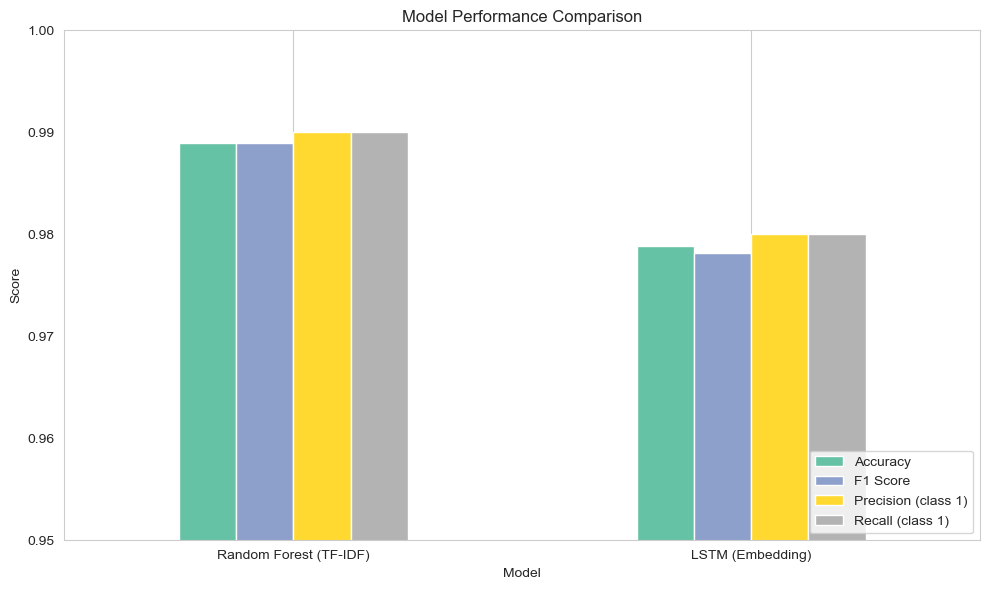

**Despite a slight reduction in performance, the LSTM model is potentially more robust when applied to longer, more complex texts. The side-by-side evaluation demonstrates how model choice impacts interpretability, scalability, and deployment.**

## III. Conclusions<a href="#III.-Conclusions" class="anchor-link">¶</a>

### 9. Performance Analysis & Comparative Discussion<a href="#9.-Performance-Analysis-&amp;-Comparative-Discussion" class="anchor-link">¶</a>

The final evaluation shows both models performed very well on the fake news classification task, with slight differences in key metrics:

|         Model          | Accuracy | F1 Score | Training Time | Interpretability |
|:----------------------:|:--------:|:--------:|:-------------:|:----------------:|
| Random Forest (TF-IDF) |  98.90%  |  0.989   |  ~10 seconds  |       High       |
|   LSTM (Embeddings)    |  97.89%  |  0.9782  | ~2.5 minutes  |       Low        |

The Random Forest model outperformed the LSTM slightly in terms of raw accuracy and required significantly less training time. Its simplicity and transparency make it ideal for practical deployment scenarios where interpretability is important. However, the LSTM model, although slightly slower, offers more robust handling of context, word order, and semantics, particularly valuable when dealing with full-length articles or domain-specific jargon. Its lower interpretability is a drawback but may be mitigated with tools like SHAP or LIME in future work.

Confusion matrices show that both models are highly accurate in classifying real and fake titles, with minimal false positives and negatives. The LSTM was slightly better at reducing false negatives which is a key advantage when missing fake news is riskier than flagging real news incorrectly. This comparative analysis supports the conclusion that traditional models remain competitive, especially on short texts. However, deep learning holds promise for more complex tasks, and its performance may improve with additional tuning or the use of pretrained embeddings (e.g., GloVe or BERT).

### 10. Project Summary and Reflections<a href="#10.-Project-Summary-and-Reflections" class="anchor-link">¶</a>

This coursework successfully demonstrated the process of building, evaluating and comparing statistical and deep learning models for fake news detection. Both models achieved high performance, validating the feasibility of automatic fake news detection from short texts like news titles.

Key learnings:

-   Traditional models like Random Forest are fast, interpretable and effective for structured datasets.
-   Deep learning models like LSTM capture language nuances and are more flexible but require more resources.
-   Preprocessing is pivotal and must be adapted to each model type.
-   Evaluation metrics like F1 score and confusion matrix provide deep insight beyond accuracy.

Future improvements:

-   Incorporate pretrained embeddings or transformer-based models like BERT.
-   Extend analysis to full article text instead of just titles.
-   Deploy the model in a live stream or web service for real-time news classification.

In conclusion, model selection should be guided not only by performance metrics but also by the application context, resource availability and the need for interpretability. This coursework provides a comprehensive comparison and sets a foundation for further exploration in intelligent news filtering systems.

## References<a href="#References" class="anchor-link">¶</a>

-   Batra, R. (2022). Multi-Class Text Classification with Scikit-Learn using TF-IDF model. \[online\] Medium. Available at: <https://medium.com/%40rohit_batra/multi-class-text-classification-with-scikit-learn-using-tf-idf-model-161d395ce374>.
-   scikit-learn.org. (n.d.). 6.2. Feature extraction — scikit-learn 0.23.1 documentation. \[online\] Available at: <https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction>.
-   Deepanshi (2021). Text Preprocessing NLP \| Text Preprocessing in NLP with Python codes. \[online\] Analytics Vidhya. Available at: <https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes>.
-   TensorFlow. (n.d.). Word embeddings \| Text. \[online\] Available at: <https://www.tensorflow.org/text/guide/word_embeddings>.
-   Shafi, A. (2023). Sklearn Random Forest Classifiers in Python Tutorial. \[online\] www.datacamp.com. Available at: <https://www.datacamp.com/tutorial/random-forests-classifier-python>.
-   Beheshti, N. (2022). Guide to Confusion Matrices & Classification Performance Metrics. \[online\] Medium. Available at: <https://medium.com/data-science/guide-to-confusion-matrices-classification-performance-metrics-a0ebfc08408e>.
-   Mikolov, T., Chen, K., Corrado, G. and Dean, J. (2013b). Efficient Estimation of Word Representations in Vector Space. \[online\] Available at: <https://arxiv.org/pdf/1301.3781>.